In [1]:
from numpy.random import seed
seed(101)
import tensorflow
tensorflow.random.set_seed(101)

import pandas as pd
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2

import imageio
import skimage
import skimage.io
import skimage.transform

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

# Number of samples we want in each class.Total images used = SAMPLE_SIZE X 2
# The minority class is class 1 with 55901 samples.

SAMPLE_SIZE = 78786                   
IMAGE_SIZE = 50



In [2]:
input_dir_path='./input/IDC_regular_ps50_idx5'
os.listdir(input_dir_path)

['10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262',
 '10264',
 '10268',
 '10269',
 '10272',
 '10273',
 '10274',
 '10275',
 '10276',
 '10277',
 '10278',
 '10279',
 '10282',
 '10285',
 '10286',
 '10288',
 '10290',
 '10291',
 '10292',
 '10293',
 '10295',
 '10299',
 '10300',
 '10301',
 '10302',
 '10303',
 '10304',
 '10305',
 '10306',
 '10307',
 '10308',
 '12241',
 '12242',
 '12626',
 '12748',
 '12749',
 '12750',
 '12751',
 '12752',
 '12810',
 '12811',
 '12817',
 '12818',
 '12819',
 '12820',
 '12821',
 '12822',
 '12823',
 '12824',
 '12826',
 '12867',
 '12868',
 '12869',
 '12870',
 '12871',
 '12872',
 '12873',
 '12875',
 '12876',
 '12877',
 '12878',
 '12879',
 '12880',
 '12881',
 '12882',
 '12883',
 '12884',
 '12886',
 '12890',
 '12891',
 '12892',
 '12893',
 '12894',
 '12895',
 '12896',
 '12897',
 '12898',
 '12900',
 '12901',
 '12905',
 '12906',
 '12907',
 '12908',
 '12909',
 '12910',
 '12911',
 '12929',
 '12930',
 '12931',
 '12932',
 '12933',


In [3]:
# Check the number of patient folders.

patients=os.listdir(input_dir_path)
len(patients)

279

In [4]:
# Create a new directory to store all available images
all_images_dir = 'all_images_dir'
# os.mkdir(all_images_dir)

In [5]:
# check that the new diectory has been created    #can't use 'ls' as it is for linux
!dir

 Volume in drive C is OS
 Volume Serial Number is F4F1-3EA8

 Directory of C:\Users\Anu

25-11-2022  16:53    <DIR>          .
19-11-2022  21:53    <DIR>          ..
16-11-2022  16:16    <DIR>          .cache
22-11-2022  09:15    <DIR>          .ipynb_checkpoints
13-10-2022  17:39    <DIR>          .ipython
13-10-2022  19:03    <DIR>          .jupyter
13-10-2022  17:50    <DIR>          .keras
13-10-2022  17:53    <DIR>          .matplotlib
09-11-2022  13:43               106 .node_repl_history
11-06-2022  19:56    <DIR>          .vscode
25-11-2022  14:33    <DIR>          all_images_dir
13-10-2022  17:38    <DIR>          anaconda3
14-09-2022  17:44               108 ayush.html
20-11-2022  20:30    <DIR>          base_dir
07-10-2022  22:31    <DIR>          Contacts
15-11-2022  10:24            16,410 DAA_FIN_project.ipynb
21-08-2022  01:23    <DIR>          Documents
25-11-2022  11:42    <DIR>          Downloads
07-10-2022  22:31    <DIR>          Favorites
25-11-2022  16:53         

In [6]:
# This code copies all images from their seperate folders into the same 
# folder called all_images_dir.

# Create a list with all the patient id numbers.
# Each patient id folder has 2 sub folders --> folder 0 and folder 1

# Example:
    # '10285'
        # '0'
        # '1'

# create a list of all patient id's
patient_list=os.listdir('./input/IDC_regular_ps50_idx5/')
for patient in patient_list:
    path_0= './input/IDC_regular_ps50_idx5/'+ str(patient) + '/0'   #this particular path style necessary for here
    path_1= './input/IDC_regular_ps50_idx5/'+ str(patient) + '/1'
    
    # create a list of all files in folder 0
    file_list_0 = os.listdir(path_0)
    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 0 images to all_images_dir
    for fname in file_list_0:

        # source path to image
        src = os.path.join(path_0, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


    # move the 1 images to all_images_dir
    for fname in file_list_1:

        # source path to image
        src = os.path.join(path_1, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [7]:
# check how many images are in all_images_dir

# size: 2.5GB
x=os.scandir(path='all_images_dir')
# len(os.listdir('all_images_dir'))
len(list(x))

277524

In [8]:
len(os.listdir('all_images_dir'))

277524

In [9]:
#Create a dataframe containing all the information¶
image_list = os.listdir('all_images_dir')

df_data = pd.DataFrame(image_list, columns=['image_id'])

df_data.head()


,image_id
0,10253_idx5_x1001_y1001_class0.png
1,10253_idx5_x1001_y1051_class0.png
2,10253_idx5_x1001_y1101_class0.png
3,10253_idx5_x1001_y1151_class0.png
4,10253_idx5_x1001_y1201_class0.png


In [10]:
# Define Helper Functions

# Each file name has this format:
# '14211_idx5_x2401_y1301_class1.png'

def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    # the id is the first index in the list
    patient_id = a[0]
    
    return patient_id

def extract_target(x):
    # split into a list
    a = x.split('_')
    # the target is part of the string in index 4
    b = a[4]
    # the ytarget i.e. 1 or 2 is the 5th index of the string --> class1
    target = b[5]
    
    return target

# extract the patient id

# create a new column called 'patient_id'
df_data['patient_id'] = df_data['image_id'].apply(extract_patient_id)
# create a new column called 'target'
df_data['target'] = df_data['image_id'].apply(extract_target)

df_data.head(10)

,image_id,patient_id,target
0,10253_idx5_x1001_y1001_class0.png,10253,0
1,10253_idx5_x1001_y1051_class0.png,10253,0
2,10253_idx5_x1001_y1101_class0.png,10253,0
3,10253_idx5_x1001_y1151_class0.png,10253,0
4,10253_idx5_x1001_y1201_class0.png,10253,0
5,10253_idx5_x1001_y1251_class0.png,10253,0
6,10253_idx5_x1001_y1301_class0.png,10253,0
7,10253_idx5_x1001_y1351_class0.png,10253,0
8,10253_idx5_x1001_y1501_class0.png,10253,0
9,10253_idx5_x1001_y1551_class0.png,10253,0


In [11]:
df_data.shape

(277524, 3)

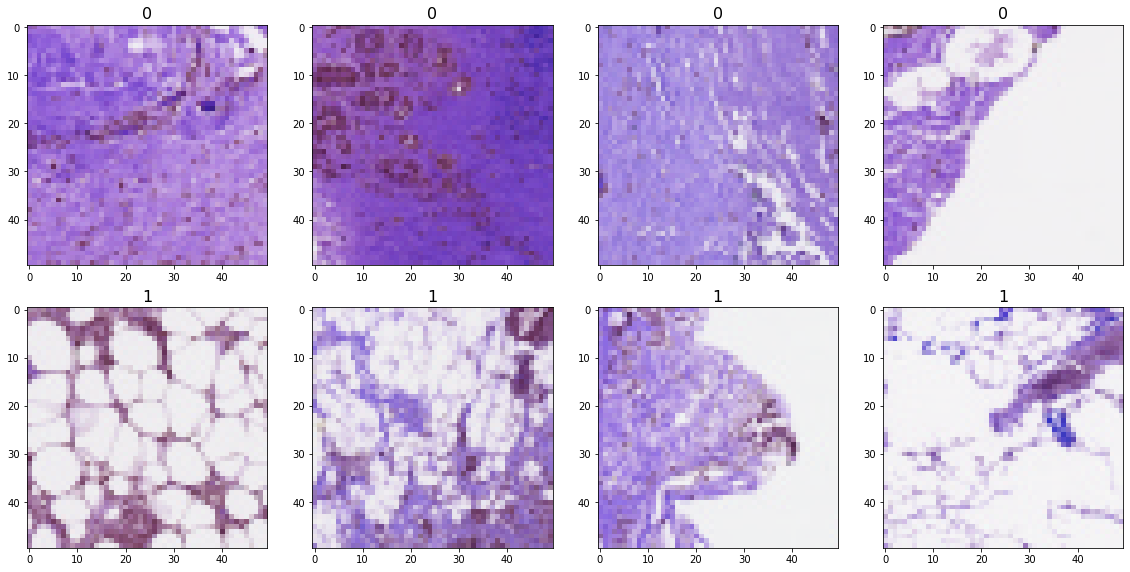

In [12]:
#Display a random sample of train images by class¶
def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    
    """
    Give a column in a dataframe,
    this function takes a sample of each class and displays that
    sample on one row. The sample size is the same as figure_cols which
    is the number of columns in the figure.
    Because this function takes a random sample, each time the function is run it
    displays different images.
    """
    

    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['image_id']
            im=cv2.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
    plt.tight_layout()
    plt.show()
    
IMAGE_PATH = 'all_images_dir/'

draw_category_images('target',4, df_data, IMAGE_PATH)

In [13]:
#Balance the class distribution
# What is the class distribution?
df_data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

In [14]:
# take a sample of the majority class 0 
df_0 = df_data[df_data['target'] == '0'].sample(SAMPLE_SIZE, random_state=101)
df_1 = df_data[df_data['target'] == '1'].sample(SAMPLE_SIZE, random_state=101)

# concat the two dataframes
df_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)

# Check the new class distribution
df_data['target'].value_counts()

0    78786
1    78786
Name: target, dtype: int64

In [15]:
#Create the train and val sets
# train_test_split

# stratify=y creates a balanced validation set.
y = df_data['target']

df_train, df_val = train_test_split(df_data, test_size=0.10, random_state=101, stratify=y)

print(df_train.shape)
print(df_val.shape)



(141814, 3)
(15758, 3)


In [16]:
df_train['target'].value_counts()

1    70907
0    70907
Name: target, dtype: int64

In [17]:
df_val['target'].value_counts()

0    7879
1    7879
Name: target, dtype: int64

In [18]:
#Create a Directory Structure
# Create a new directory
base_dir = 'base_dir'
# os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':

# train_dir
    # a_no_idc
    # b_has_idc

# val_dir
    # a_no_idc
    # b_has_idc



# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
# os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
# os.mkdir(val_dir)


# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
a_no_idc = os.path.join(train_dir, 'a_no_idc')
# os.mkdir(a_no_idc)
b_has_idc = os.path.join(train_dir, 'b_has_idc')
# os.mkdir(b_has_idc)


# create new folders inside val_dir
a_no_idc = os.path.join(val_dir, 'a_no_idc')
# os.mkdir(a_no_idc)
b_has_idc = os.path.join(val_dir, 'b_has_idc')
# os.mkdir(b_has_idc)

In [19]:
# check that the folders have been created
os.listdir('base_dir/train_dir')

['a_no_idc', 'b_has_idc']

In [20]:
#Transfer the images into the folders
# Set the id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [21]:
# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])



# Transfer the train images

for image in train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    
    # source path to image
    src = os.path.join(all_images_dir, fname)
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)
    

# Transfer the val images

for image in val_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    

    # source path to image
    src = os.path.join(all_images_dir, fname)
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)

In [22]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/a_no_idc')))
print(len(os.listdir('base_dir/train_dir/b_has_idc')))

70907
70907


In [23]:
# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/a_no_idc')))
print(len(os.listdir('base_dir/val_dir/b_has_idc')))

7879
7879


In [24]:
#-----this code part left----Set Up the Generators
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'


num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [25]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 141814 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.


In [26]:
#Create the Model Architecture

kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', 
                 input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        18496     
                                                        

In [27]:
#Train the Model                       #learning_rate:new version of lr
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [44]:
filepath= './model.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=20, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/20
14182/14182 [==============================] - ETA: 0s - loss: 0.3415 - accuracy: 0.8576
Epoch 1: val_accuracy improved from -inf to 0.85848, saving model to .\model.h5
14182/14182 [==============================] - 2763s 195ms/step - loss: 0.3415 - accuracy: 0.8576 - val_loss: 0.3388 - val_accuracy: 0.8585 - lr: 1.0000e-04
Epoch 2/20
14182/14182 [==============================] - ETA: 0s - loss: 0.3366 - accuracy: 0.8591
Epoch 2: val_accuracy improved from 0.85848 to 0.86718, saving model to .\model.h5
14182/14182 [==============================] - 2718s 192ms/step - loss: 0.3366 - accuracy: 0.8591 - val_loss: 0.3213 - val_accuracy: 0.8672 - lr: 1.0000e-04
Epoch 3/20
14182/14182 [==============================] - ETA: 0s - loss: 0.3318 - accuracy: 0.8618
Epoch 3: val_accuracy improved from 0.86718 to 0.86838, saving model to .\model.h5
14182/14182 [==============================] - 2221s 157ms/step - loss: 0.3318 - accuracy: 0.8618 - val_loss: 0.3177 - val_accuracy: 0.8684 

In [45]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

In [46]:
# Here the best epoch will be used.

model.load_weights('./model.h5')
val_loss, val_accuracy = \
model.evaluate(test_gen,steps=len(df_val))       #model.evaluate_generator deprecated so model.evaluate used

print('val_loss:', val_loss)
print('val_acc:', val_accuracy)

15758/15758 [==============================] - 197s 12ms/step - loss: 0.2914 - accuracy: 0.8792
val_loss: 0.29143026471138
val_acc: 0.8792359232902527


<Figure size 432x288 with 0 Axes>

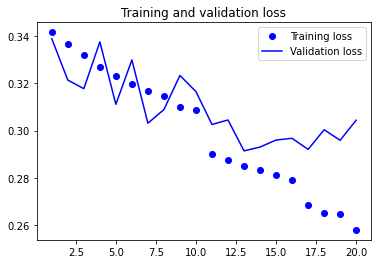

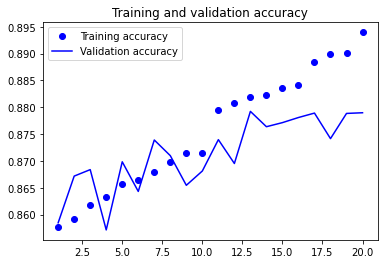

<Figure size 432x288 with 0 Axes>

In [47]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [48]:
# make a prediction
predictions = model.predict(test_gen, steps=len(df_val), verbose=1)

15758/15758 [==============================] - 193s 12ms/step


In [49]:
predictions.shape

(15758, 2)

In [50]:
# This is how to check what index keras has internally assigned to each class. 
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

In [51]:
# Put the predictions into a dataframe.
# The columns need to be oredered to match the output of the previous cell

df_preds = pd.DataFrame(predictions, columns=['no_idc', 'has_idc'])

df_preds.head()

,no_idc,has_idc
0,0.236468,0.763532
1,0.262635,0.737365
2,0.909270,0.090730
3,0.889749,0.110251
4,0.023847,0.976153


In [52]:
# Get the true labels
y_true = test_gen.classes

# Get the predicted labels as probabilities
y_pred = df_preds['has_idc']

In [53]:
# What is the AUC Score?
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred)

0.9484110565500299

In [54]:
# Source: Scikit Learn website
# http://scikit-learn.org/stable/auto_examples/
# model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-
# selection-plot-confusion-matrix-py


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [55]:
# Get the labels of the test images.

test_labels = test_gen.classes


In [56]:
test_labels.shape

(15758,)

In [57]:
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))
# Print the label associated with each class
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

Confusion matrix, without normalization
[[6819 1060]
 [ 843 7036]]


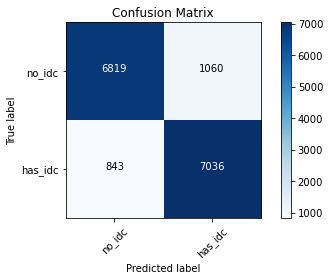

In [58]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['no_idc', 'has_idc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [59]:
from sklearn.metrics import classification_report

# Generate a classification report

# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

      no_idc       0.89      0.87      0.88      7879
     has_idc       0.87      0.89      0.88      7879

    accuracy                           0.88     15758
   macro avg       0.88      0.88      0.88     15758
weighted avg       0.88      0.88      0.88     15758



In [70]:
pip install tensorflowjs

  Using cached tensorflowjs-4.1.0-py3-none-any.whl (84 kB)
  Using cached importlib_resources-5.10.0-py3-none-any.whl (34 kB)
  Using cached flax-0.6.2-py3-none-any.whl (189 kB)
  Using cached tensorflowjs-4.0.0-py3-none-any.whl (83 kB)
  Using cached tensorflowjs-3.21.0-py3-none-any.whl (81 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached jax-0.3.25.tar.gz (1.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached optax-0.1.4-py3-none-any.whl (154 kB)
  Using cached tensorstore-0.1.28-cp39-cp39-win_amd64.whl (6.5 MB)
  Using cached rich-12.6.0-py3-none-any.whl (237 kB)
  Using cached commonmark-0.9.1-py2.py3-none-any.whl (51 kB)
  Using cached chex-0.1.5-py3-none-any.whl (85 kB)
  Using cached optax-0.1.3-py3-none-any.whl (145 kB)
  Using cached optax-0.1.2-py3-none-any.whl (140 kB)
  Using cached optax-0.1.1-py3-none-any.whl (136 kB)
  Using cached optax-0.1.0-py3-none-any.whl (126 kB

In [76]:
# Use the command line conversion tool to convert the model

!tensorflowjs_converter --input_format keras ./model.h5 ./tfjs_model_1/model

2022-11-28 10:55:45.021047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-28 10:55:45.021151: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
